In [1]:
import os
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Définir le chemin du dossier où enregistrer les modèles
from joblib import dump
joblib_dir = './joblib'


In [2]:
# 1. Définir les 43 colonnes officielles de NSL-KDD
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", 
           "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
           "dst_host_srv_rerror_rate", "attack", "difficulty_level"]

# 2. Charger avec l'argument 'names'
train = pd.read_csv('../data/KDDTrain+.csv', names=columns)
test = pd.read_csv('../data/KDDTest+.csv', names=columns)

# 3. Supprimer la colonne 'difficulty_level' qui n'est pas utile 
train.drop('difficulty_level', axis=1, inplace=True)
test.drop('difficulty_level', axis=1, inplace=True)

print("Chargement réussi. Colonnes détectées :", train.columns.tolist())

Chargement réussi. Colonnes détectées : ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack']


In [3]:
# Display the first few rows of the dataset
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

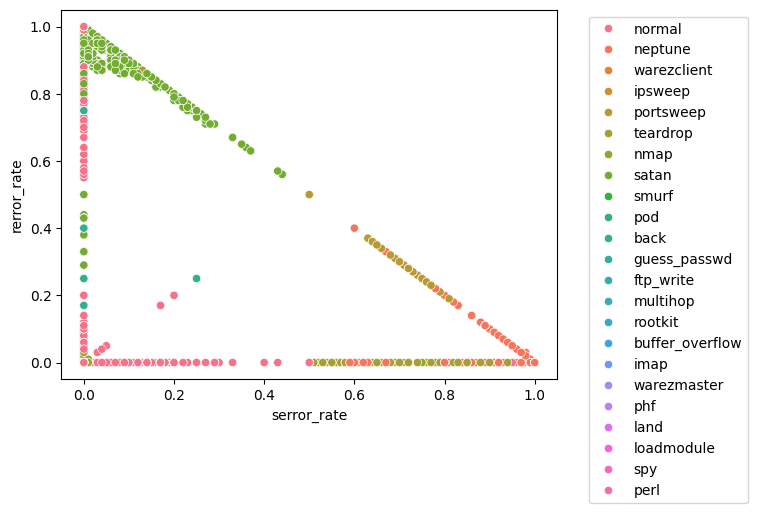

In [5]:
sns.scatterplot(data=train, x="serror_rate", y="rerror_rate", hue="attack")

# Afficher la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

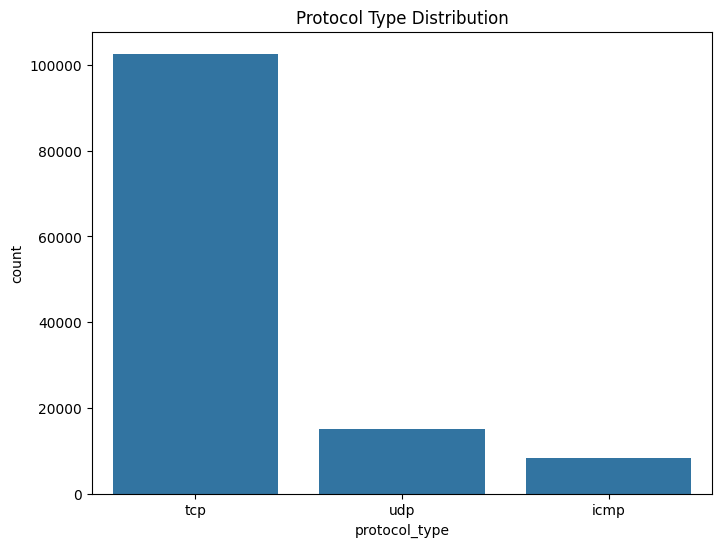

In [6]:
# Plotting Protocol Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='protocol_type', data=train)
plt.title('Protocol Type Distribution')
plt.show()

/var/folders/1l/4gjtcb593ddfj09zvr8cfqq00000gp/T/ipykernel_94544/2776465345.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


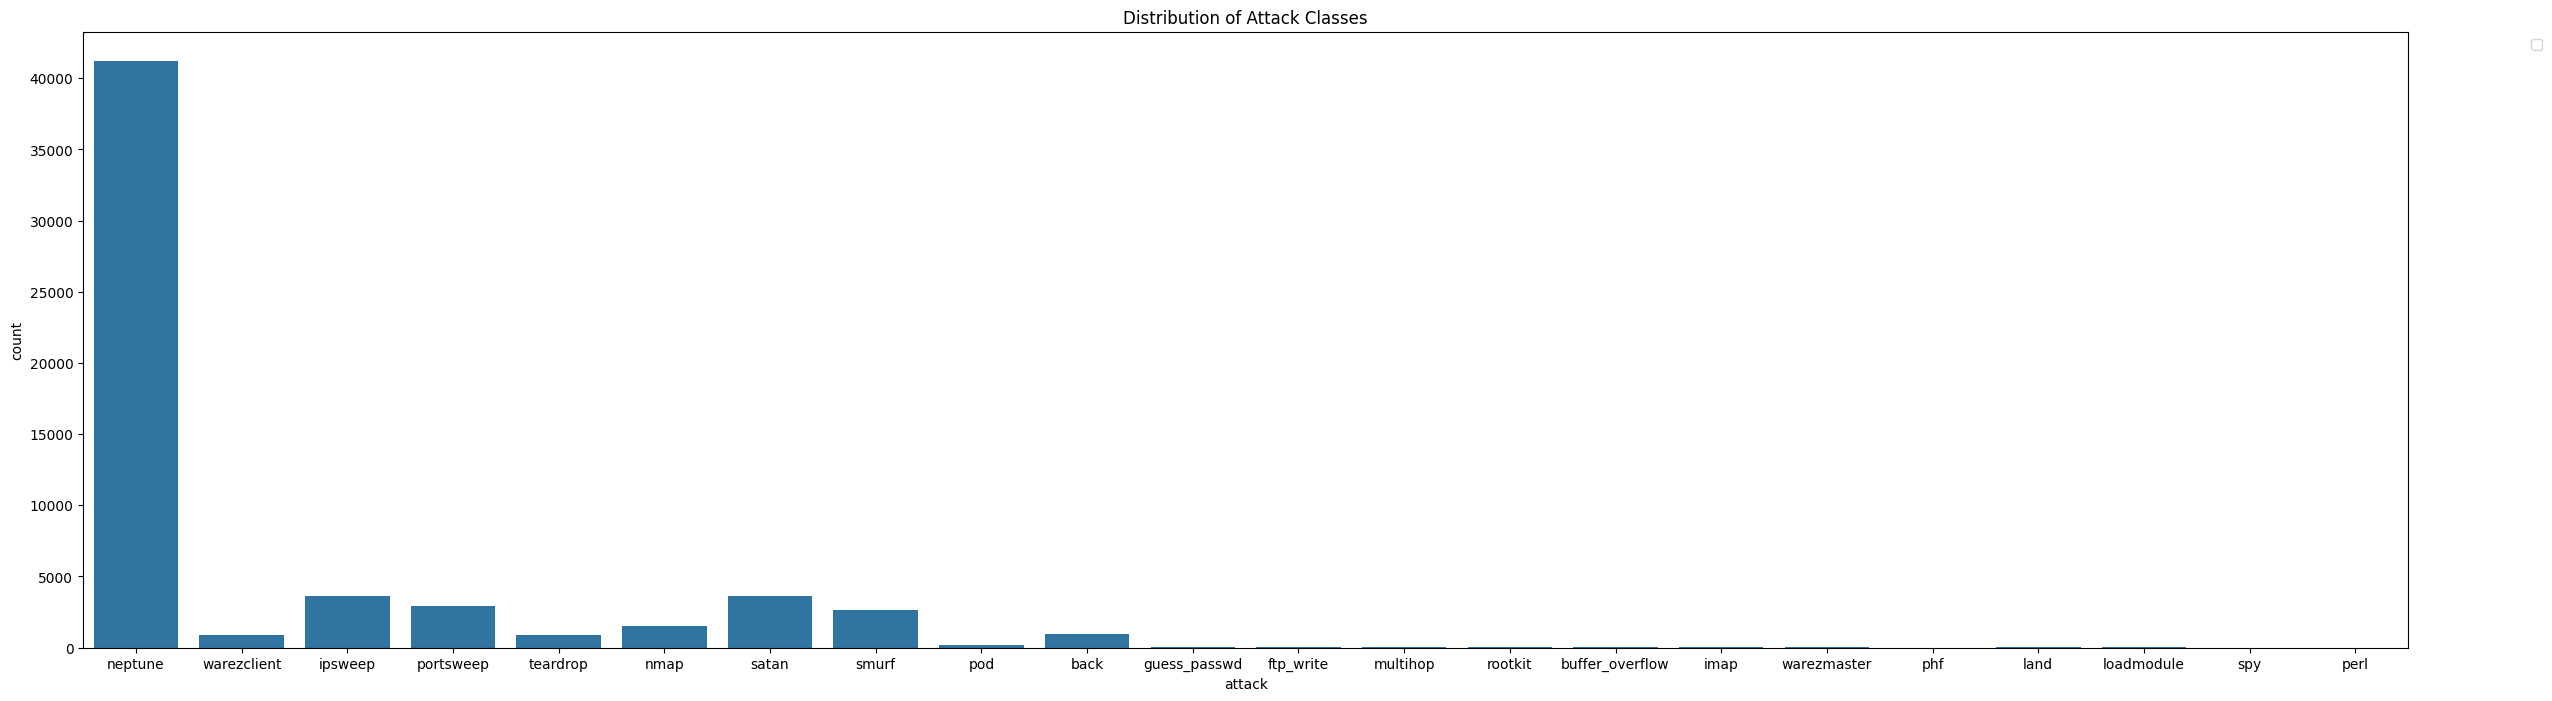

In [7]:
train_filtered = train[train['attack'] != 'normal']

# Créer le countplot avec les données filtrées
plt.figure(figsize=(30, 8))
sns.countplot(x='attack', data=train_filtered)
plt.title('Distribution of Attack Classes')

# Afficher la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

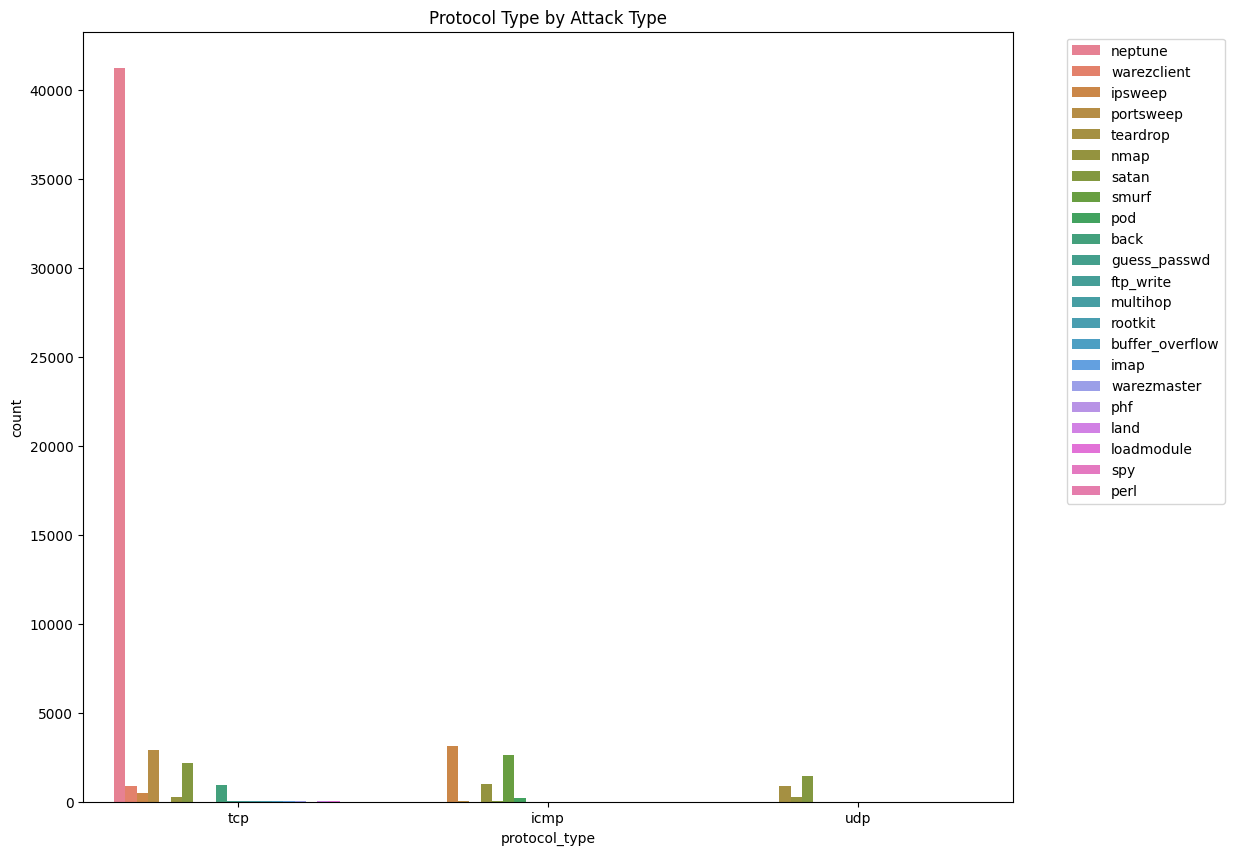

In [8]:
train_filtered = train[train['attack'] != 'normal']

# Créer le countplot avec les données filtrées
plt.figure(figsize=(12, 10))
sns.countplot(data=train_filtered, x='protocol_type', hue='attack')
plt.title('Protocol Type by Attack Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

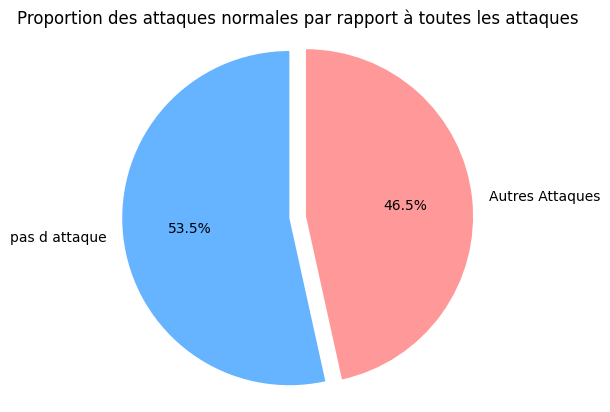

In [9]:
attack_counts = train['attack'].value_counts()

# Calculer la proportion des attaques nommées "normal" par rapport au nombre total d'attaques
normal_count = attack_counts.get('normal', 0)
total_count = attack_counts.sum()
proportion_normal = normal_count / total_count

# Créer un graphique en cercle pour représenter cette proportion
labels = ['pas d attaque', 'Autres Attaques']
sizes = [proportion_normal, 1 - proportion_normal]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode le premier secteur

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Le graphique est un cercle
plt.title('Proportion des attaques normales par rapport à toutes les attaques')
plt.show()

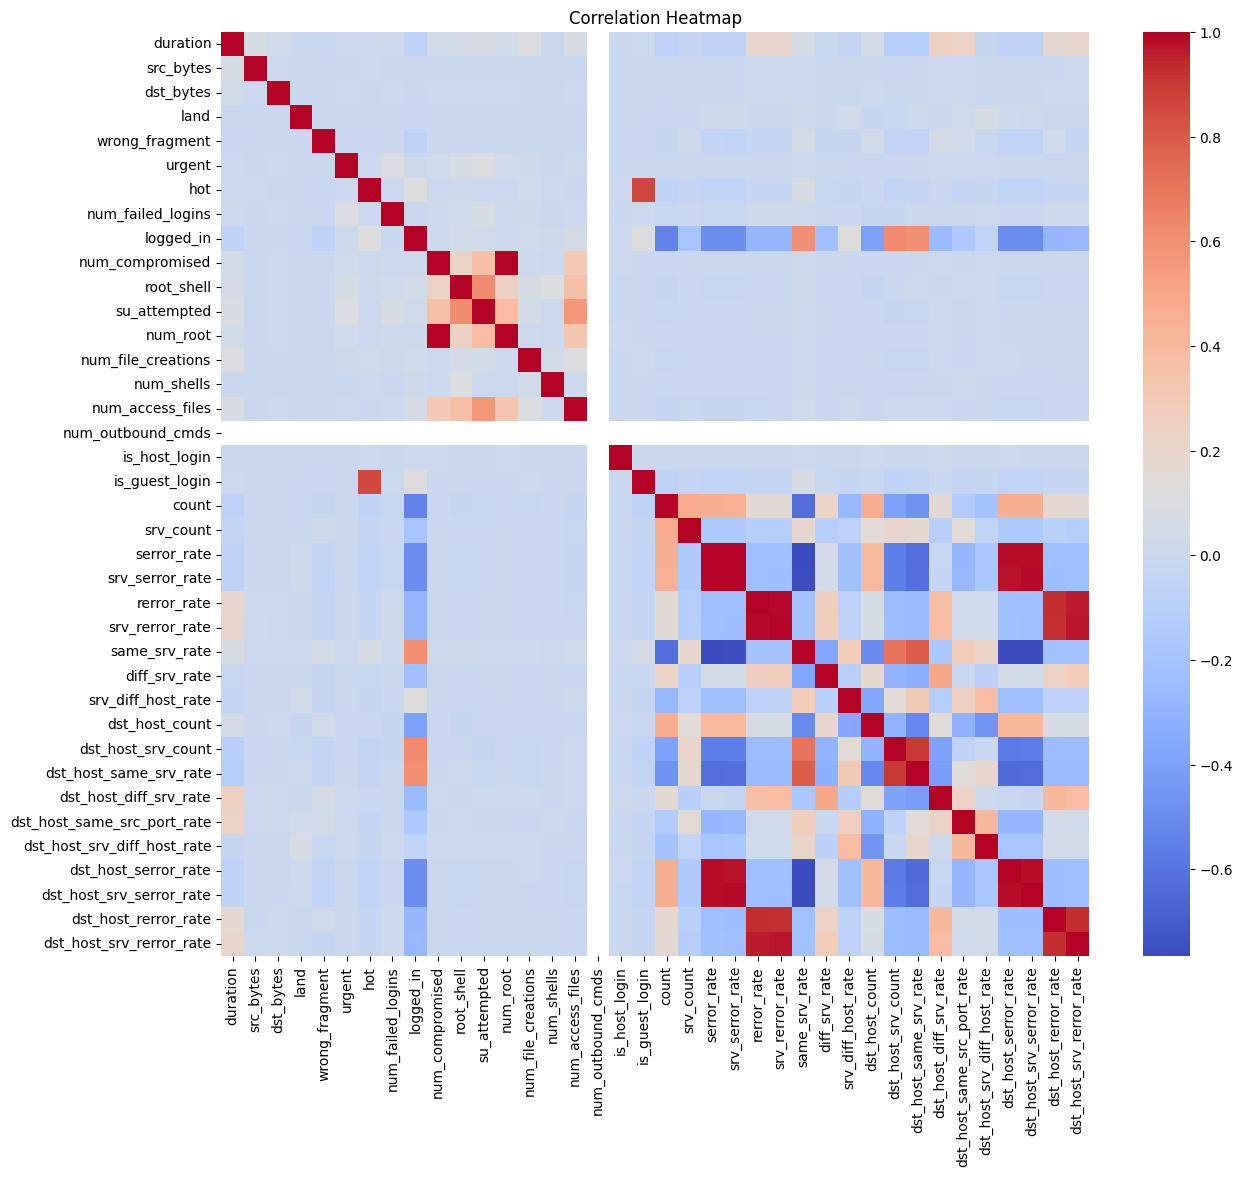

In [10]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = train.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
## Check for missing values in both train and test datasets
missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()
print("Missing values in training data:\n", missing_values_train)
print("----------------------------------------------")
print("Missing values in test data:\n", missing_values_test)

Missing values in training data:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_

# Encoding categorical variables

In [ ]:
# 1. Rechargement complet pour repartir sur des bases saines
full_columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "difficulty_level"]

train = pd.read_csv('../data/KDDTrain+.csv', names=full_columns)
test = pd.read_csv('../data/KDDTest+.csv', names=full_columns)

# 2. Suppression immédiate de la colonne inutile
train = train.drop(columns=['difficulty_level', 'num_outbound_cmds'], errors='ignore')
test = test.drop(columns=['difficulty_level', 'num_outbound_cmds'], errors='ignore')

# 3. Encodage de 'attack' AVANT toute autre transformation
train['attack'] = np.where(train['attack'].astype(str).str.contains('normal'), 0, 1)
test['attack'] = np.where(test['attack'].astype(str).str.contains('normal'), 0, 1)

# 4. Encodage des catégories
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    # On apprend sur train + test pour éviter les labels inconnus
    combined = pd.concat([train[col].astype(str), test[col].astype(str)])
    le.fit(combined)
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# 5. Scaling (Normalisation)
from sklearn.preprocessing import StandardScaler
numerical_cols = [c for c in train.columns if c not in categorical_cols + ['attack']]
scaler = StandardScaler()

train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

print(" Tout est prêt !")
print("Vérification Train 'attack' :", train['attack'].value_counts().to_dict())
print("Vérification Test 'attack' :", test['attack'].value_counts().to_dict())
train.head()

✅ Tout est prêt !
Vérification Train 'attack' : {0: 67343, 1: 58630}
Vérification Test 'attack' : {1: 12833, 0: 9710}


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,-0.110249,1,20,9,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0
1,-0.110249,2,44,9,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
2,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1
3,-0.110249,1,24,9,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0
4,-0.110249,1,24,9,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0


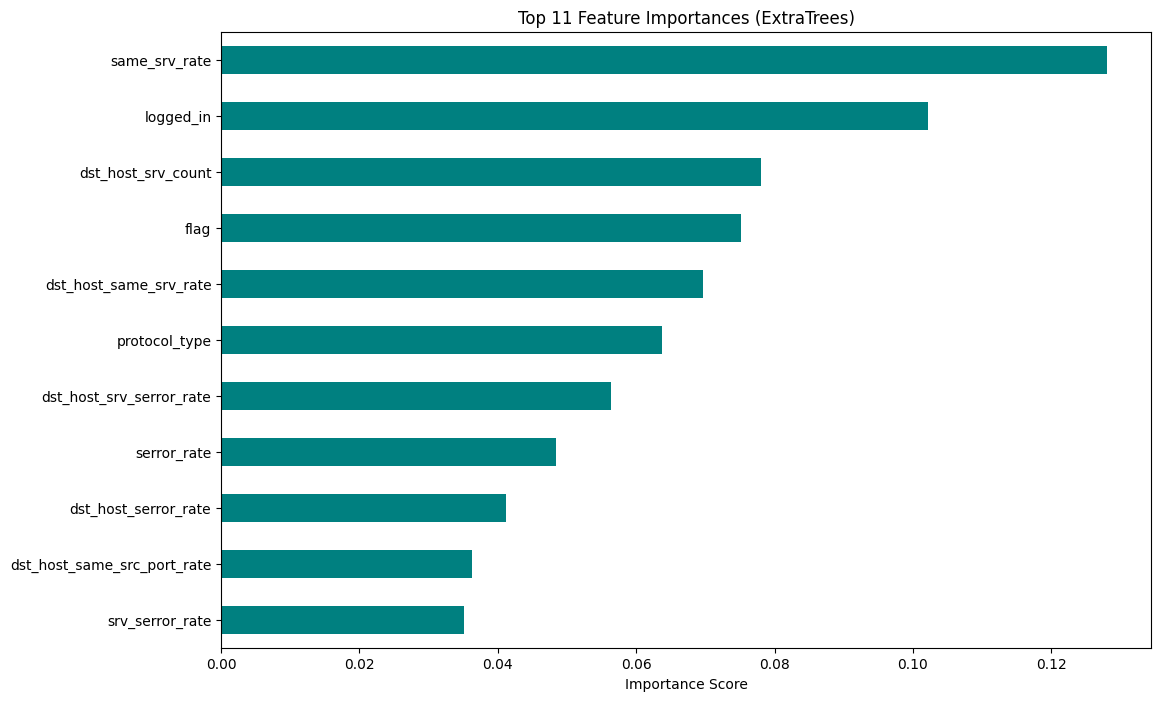

Les 11 colonnes sélectionnées sont : ['same_srv_rate', 'logged_in', 'dst_host_srv_count', 'flag', 'dst_host_same_srv_rate', 'protocol_type', 'dst_host_srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_same_src_port_rate', 'srv_serror_rate']


In [13]:
# --- CELLULE DE FEATURE SELECTION ---

# 1. On définit le modèle
model_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)

# 2. On sépare les caractéristiques (X) de la cible (y)
X_train_fs = train.drop('attack', axis=1)
y_train_fs = train['attack']

# 3. On entraîne le modèle pour calculer l'importance
model_fs.fit(X_train_fs, y_train_fs)

# 4. On récupère les 11 meilleures colonnes
feat_importances = pd.Series(model_fs.feature_importances_, index=X_train_fs.columns)
top_features_list = feat_importances.nlargest(11).index.tolist()

# 5. Affichage du graphique pour ton rapport
plt.figure(figsize=(12, 8))
feat_importances.nlargest(11).plot(kind='barh', color='teal')
plt.title('Top 11 Feature Importances (ExtraTrees)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

print("Les 11 colonnes sélectionnées sont :", top_features_list)

In [15]:
# --- ÉTAPE 1 MODIFIÉE ---
train = pd.read_csv('../data/KDDTrain+.csv', names=full_columns)
test = pd.read_csv('../data/KDDTest+.csv', names=full_columns)

# Création de la copie de sauvegarde AVANT le scaling
train_original = train.copy() 

# ... (continuez avec les étapes 2, 3, 4) ...

# --- ÉTAPE 5 MODIFIÉE ---
from sklearn.preprocessing import StandardScaler
numerical_cols = [c for c in train.columns if c not in categorical_cols + ['attack']]
scaler = StandardScaler()

# On garde 'train' pour les données scalées
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

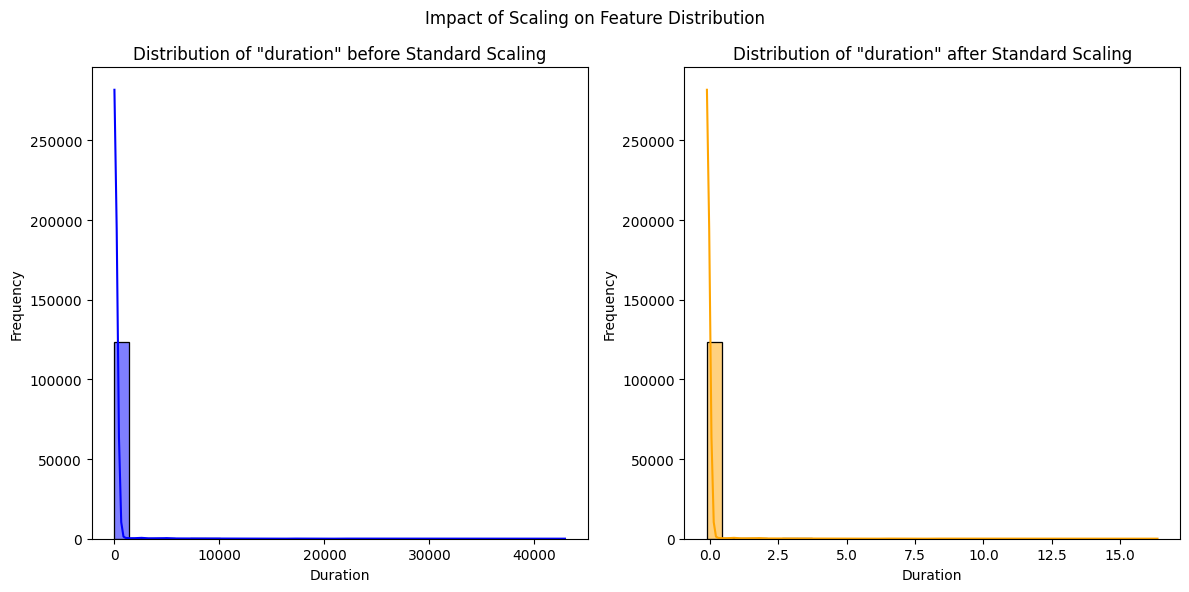

In [16]:
# Plotting
feature = 'duration'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_original[feature], bins=30, color='blue', kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of "duration" before Standard Scaling')  
plt.subplot(1, 2, 2)
sns.histplot(train[feature], bins=30, color='orange', kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of "duration" after Standard Scaling')  

plt.suptitle('Impact of Scaling on Feature Distribution')  
plt.tight_layout()
plt.show()

In [27]:
# 1. Rechargement et création de la copie
train = pd.read_csv('../data/KDDTrain+.csv', names=full_columns)
test = pd.read_csv('../data/KDDTest+.csv', names=full_columns)
train_original = train.copy() 

# 2. Nettoyage
train = train.drop(columns=['difficulty_level', 'num_outbound_cmds'], errors='ignore')
test = test.drop(columns=['difficulty_level', 'num_outbound_cmds'], errors='ignore')

# 3. ENCODAGE DE LA CIBLE (C'est ici que ça bloquait)
train['attack'] = np.where(train['attack'].astype(str).str.contains('normal'), 0, 1)
test['attack'] = np.where(test['attack'].astype(str).str.contains('normal'), 0, 1)

# 4. ENCODAGE DES CATÉGORIES (Protocol, Service, Flag)
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    combined = pd.concat([train[col].astype(str), test[col].astype(str)])
    le.fit(combined)
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# 5. SCALING
numerical_cols = [c for c in train.columns if c not in categorical_cols + ['attack']]
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

# 6. FILTRAGE FINAL (Utilise les 11 colonnes sélectionnées plus tôt)
X_train = train[top_features_list].values
y_train = train['attack'].values
X_test = test[top_features_list].values
y_test = test['attack'].values

print("X_train shape:", X_train.shape)
print(y_train)

X_train shape: (125973, 11)
[0 0 1 ... 0 1 0]


In [32]:
from joblib import dump
# On sauvegarde le scaler qui a appris sur les 11 colonnes
dump(scaler, 'joblib/scaler.joblib')
print(" Scaler synchronisé avec les nouvelles colonnes !")

 Scaler synchronisé avec les nouvelles colonnes !


Dossier './joblib' créé avec succès.
 Logistic Regression Accuracy: 0.78552
 Random Forest Accuracy: 0.76281
 Naive Bayes Accuracy: 0.75034
 KNN Accuracy: 0.77603
 SVC Accuracy: 0.75926


/var/folders/1l/4gjtcb593ddfj09zvr8cfqq00000gp/T/ipykernel_94544/1196078323.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


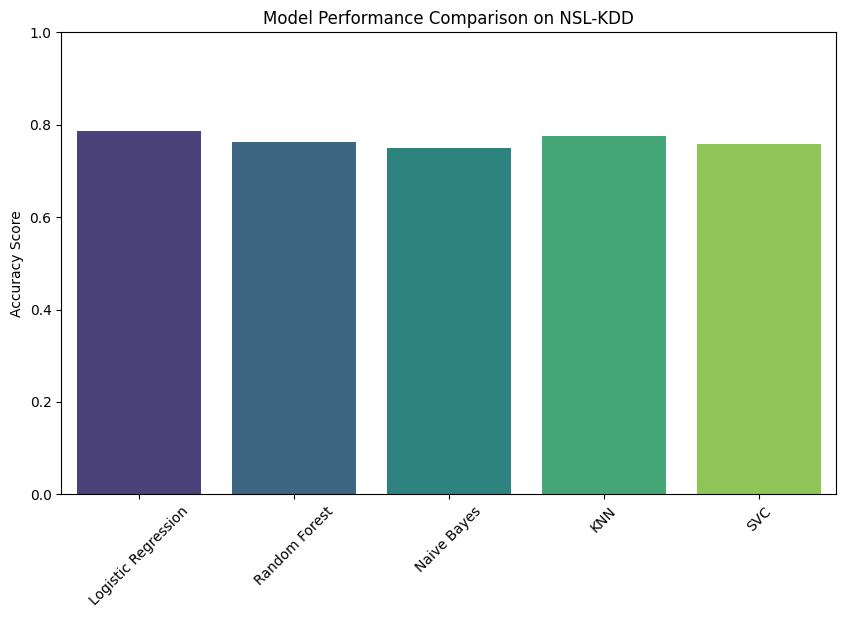

In [28]:
import os
from joblib import dump

# --- AJOUT SÉCURITÉ : Création du dossier ---
joblib_dir = './joblib'
if not os.path.exists(joblib_dir):
    os.makedirs(joblib_dir)
    print(f"Dossier '{joblib_dir}' créé avec succès.")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', C=0.01),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f" {name} Accuracy: {accuracy:.5f}")
    
    # Sauvegarde sans erreur
    model_path = os.path.join(joblib_dir, f'{name.replace(" ", "_")}_model.joblib')
    dump(model, model_path)

# --- Visualisation ---
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Model Performance Comparison on NSL-KDD')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) # Pour mieux voir les différences
plt.xticks(rotation=45)
plt.show()

In [33]:
# Best Model Selection
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]}")

Best Model: Logistic Regression with accuracy 0.7855210043028878


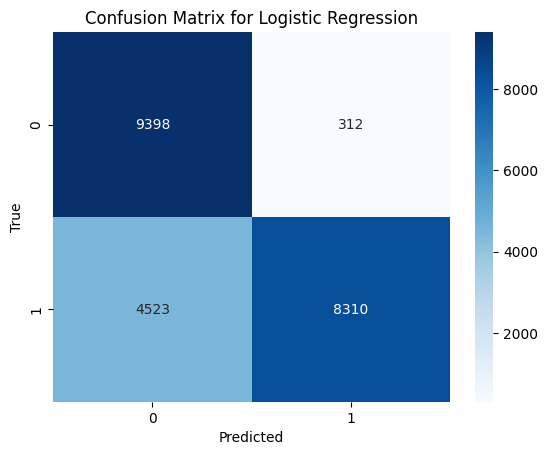

In [34]:
# Confusion Matrix of the best model
y_pred = best_model.predict(X_test)  # Ensure X_test is your holdout test set
conf_mat = confusion_matrix(y_test, y_pred)  # Ensure y_test is your holdout test set
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
from sklearn.ensemble import VotingClassifier

# Définir les modèles
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, penalty='l2', C=0.01)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Naive Bayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC())
]

# Créer un VotingClassifier avec vote majoritaire
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Entraîner le VotingClassifier sur les données d'entraînement
voting_clf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_voting = voting_clf.predict(X_test)

# Calculer l'accuracy du VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.5f}")

Voting Classifier Accuracy: 0.76325


In [36]:
from sklearn.ensemble import VotingClassifier

# Définir les modèles
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, penalty='l2', C=0.01)),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC())
]

# Créer un VotingClassifier avec vote majoritaire
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Entraîner le VotingClassifier sur les données d'entraînement
voting_clf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_voting = voting_clf.predict(X_test)

# Calculer l'accuracy du VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.5f}")

Voting Classifier Accuracy: 0.76396


In [37]:
from joblib import dump
import os

# Création du chemin (on s'assure que le nom correspond à ce que cherche app.py)
model_path = './joblib/final_voting_model.joblib'

# Sauvegarde physique du fichier
dump(voting_clf, model_path)

['./joblib/final_voting_model.joblib']

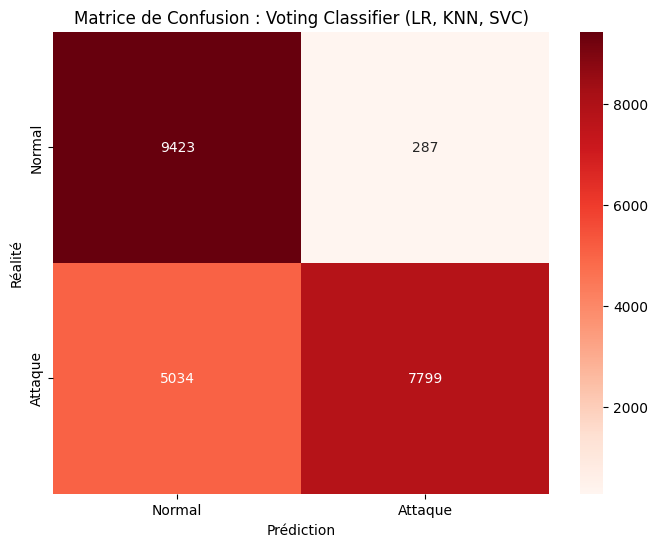

              precision    recall  f1-score   support

      Normal       0.65      0.97      0.78      9710
     Attaque       0.96      0.61      0.75     12833

    accuracy                           0.76     22543
   macro avg       0.81      0.79      0.76     22543
weighted avg       0.83      0.76      0.76     22543



In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calcul de la matrice
cm = confusion_matrix(y_test, y_pred_voting)

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Attaque'], yticklabels=['Normal', 'Attaque'])
plt.title('Matrice de Confusion : Voting Classifier (LR, KNN, SVC)')
plt.ylabel('Réalité')
plt.xlabel('Prédiction')
plt.show()

# Rapport détaillé
print(classification_report(y_test, y_pred_voting, target_names=['Normal', 'Attaque']))

In [40]:
from joblib import dump
from sklearn.preprocessing import StandardScaler

# 1. On crée un nouveau scaler spécifique aux 11 colonnes
scaler_11 = StandardScaler()

# 2. On l'entraîne UNIQUEMENT sur les colonnes sélectionnées
# train[top_features_list] contient vos 11 colonnes
scaler_11.fit(train[top_features_list])

# 3. On le sauvegarde à la place de l'ancien
dump(scaler_11, '../notebooks/joblib/scaler.joblib')

print("✅ Scaler spécifique aux 11 colonnes sauvegardé !")

✅ Scaler spécifique aux 11 colonnes sauvegardé !
